### Testing random variable functions

TODO:\
1-) Seperate functions\
2-) Convert to unit testing taking reference of envelope of the histogram

In [1]:
#------------------------------------------------------------------------------#
# Adding comm module path
#------------------------------------------------------------------------------#
import os
import sys
module_path = os.path.abspath(os.path.join('../..'))
if module_path not in sys.path:
    sys.path.append(module_path)

from utils.random_variables import *

import numpy as np
import matplotlib.pyplot as plt

pi = np.pi
from numpy import exp as exp
from numpy import log as log
from numpy import cos as cos
from numpy import sin as sin
from numpy import sqrt as sqrt
from numpy import sign as sign
from numpy import real as real
from numpy import imag as imag

from math import gamma as gamma # For nakagami random variables

from scipy.special import kv as besselk # For G-K. Args.: kv(v, z), v -> Order of Bessel func., z -> Argument 


In [2]:
#------------------------------------------------------------------------------#
# Test Bed: Calculations
#------------------------------------------------------------------------------#
length = int(1e6)
n_s = np.arange(-10, 10, 0.01)
n_s_pos = np.arange(0, 10, 0.01)

### Testing Gaussian RV
# Create Dataset
gaussian_mean = 0
gaussian_variance = 1

# Simulated samples
gaussian_samples = gaussian_rv(gaussian_mean, gaussian_variance, length)

# Theoretical values
gaussian_hist_theoretical = exp( -(( n_s - gaussian_mean)**2) / (2 * gaussian_variance) )/(sqrt(gaussian_variance * 2 * pi))

### Testing Rayleigh RV
rayleigh_omega = 1
rayleigh_variance = rayleigh_omega / 2

# Simulated samples
rayleigh_samples = rayleigh_rv(rayleigh_omega, length)

# Theoretical values
rayleigh_hist_theoretical = exp( -((n_s_pos)**2)/2/rayleigh_variance ) * n_s_pos / rayleigh_variance

### Testing Nakagami-m R.V. for integer m values
n_omega = 1 # Omega for Nakagami-m  RVs
int_m = 3

# Simulated samples
nakagami_int_samples = nakagami_int_m_rv(int_m, n_omega, length)

# Theoretical values
nakagami_int_hist_theoretical = (2*(int_m**int_m)*(n_s_pos**(2*int_m-1)) * (exp(-int_m/n_omega*((n_s_pos)**2))) / (gamma(int_m)*(n_omega)**int_m))

### Testing Nakagami-m R.V. for half-integer m values
half_int_m = 1.5

# Simulated samples
nakagami_half_int_samples = nakagami_half_int_m_rv(half_int_m, n_omega, length)

# Theoretical values
nakagami_half_int_hist_theoretical = (2*(half_int_m**half_int_m)*(n_s_pos**(2*half_int_m-1)) * (exp(-half_int_m/n_omega*((n_s_pos)**2))) / (gamma(half_int_m)*(n_omega)**half_int_m))

### Testing Gamma RV
k = 9
y_0 = 0.5

# Simulated samples
gamma_samples =  gamma_rv(k, y_0, length) # Alternative: np.random.gamma(k, y_0, length)


# Theoretical values
gamma_theoretical = ( (n_s_pos**(k-1)) * exp(-n_s_pos/y_0)) / (gamma(k) * y_0**k)

### Testing Generalized-K
gk_power = 1
gk_m = 2
gk_k = 20

# Simulated samples
generalized_k_samples = generalized_k_rv_from_double_nakagami(gk_power, gk_k, gk_m, length)

# Theoretical values
y0 = gk_power / gk_k;
b = 2 * sqrt(gk_m/y0);
bessel_base = gk_k - gk_m;

generalized_k_theoretical = 2 * b / (gamma(gk_m)*gamma(gk_k)) * ((b*n_s_pos/2)**(gk_k+gk_m-1)) * besselk(bessel_base, b*n_s_pos)


C:\Users\HZF\.conda\envs\MachineLearning\lib\site-packages\ipykernel_launcher.py:72: RuntimeWarning: invalid value encountered in multiply


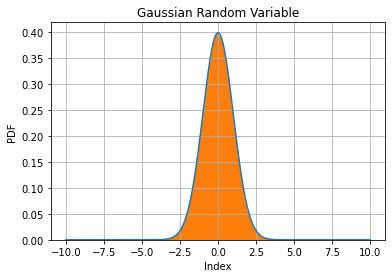

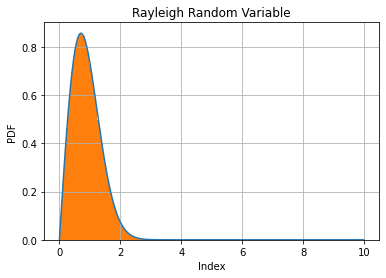

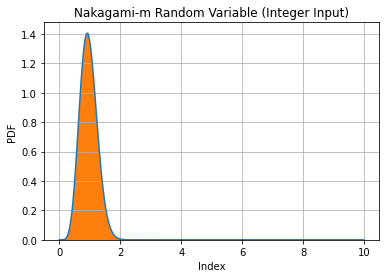

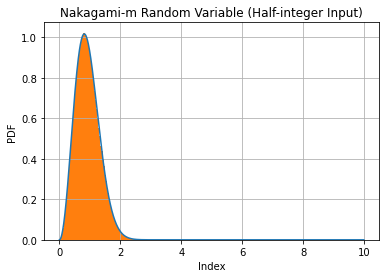

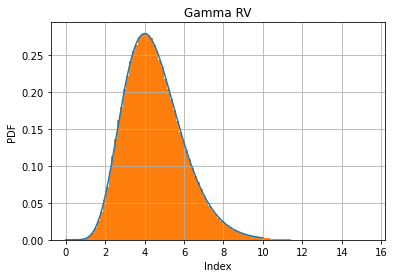

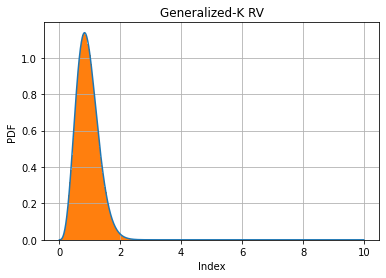

In [3]:
#------------------------------------------------------------------------------#
# Test Bed: Figures
#------------------------------------------------------------------------------#
hist_bin = 100

# Plotting Gaussian RV
plt.figure()
plt.plot(n_s, gaussian_hist_theoretical, label = 'Theoretical')
plt.hist(gaussian_samples, bins = hist_bin, density=True, label = 'Simulated')
plt.grid()
plt.xlabel('Index')
plt.ylabel('PDF')
plt.title('Gaussian Random Variable')
plt.show()

### Plotting Rayleigh RV
plt.figure()
plt.plot(n_s_pos, rayleigh_hist_theoretical, label = 'Theoretical')
plt.hist(rayleigh_samples, bins = hist_bin, density=True, label = 'Simulated')
plt.grid()
plt.xlabel('Index')
plt.ylabel('PDF')
plt.title('Rayleigh Random Variable')
plt.show()

### Plotting Nakagami-m with integer values
plt.figure()
plt.plot(n_s_pos, nakagami_int_hist_theoretical, label = 'Theoretical')
plt.hist(nakagami_int_samples, bins = hist_bin, density=True, label = 'Simulated')
plt.grid()
plt.xlabel('Index')
plt.ylabel('PDF')
plt.title('Nakagami-m Random Variable (Integer Input)')
plt.show()

### Plotting Nakagami-m with half-integer values
plt.figure()
plt.plot(n_s_pos, nakagami_half_int_hist_theoretical, label = 'Theoretical')
plt.hist(nakagami_half_int_samples, bins = hist_bin, density=True, label = 'Simulated')
plt.grid()
plt.xlabel('Index')
plt.ylabel('PDF')
plt.title('Nakagami-m Random Variable (Half-integer Input)')
plt.show()

### Plotting Gamma RV
plt.figure()
plt.plot(n_s_pos, gamma_theoretical, label = 'Theoretical')
plt.hist(gamma_samples, bins = hist_bin, density=True, label = 'Simulated')
plt.grid()
plt.xlabel('Index')
plt.ylabel('PDF')
plt.title('Gamma RV')
plt.show()

### Plotting Generalized-K
plt.figure()
plt.plot(n_s_pos, generalized_k_theoretical, label = 'Theoretical')
plt.hist(generalized_k_samples, bins = hist_bin, density=True, label = 'Simulated')
plt.grid()
plt.xlabel('Index')
plt.ylabel('PDF')
plt.title('Generalized-K RV')
plt.show()
